# Video Game Sales Prediction

This project aims to predict global video game sales using various machine learning regression models. It utilizes a dataset containing information about video games, including features like release year, platform, genre, and regional sales figures.

Workflow
1. Load and preprocess the video game sales data
2. Split data into training and testing sets and Train multiple regression models
3. Evaluate and compare model performances

Dataset, This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Dataset Link: https://www.kaggle.com/datasets/gregorut/videogamesales

Example Solution: https://thecleverprogrammer.com/2021/05/28/video-game-sales-prediction-model-with-python/

Hugging Face: https://huggingface.co/spaces/alperugurcan/video-games-sales-prediction

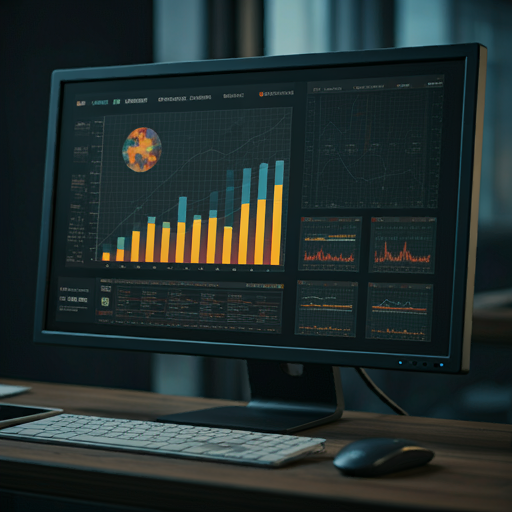

## 1. Load and preprocess the video game sales data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("vgsales.csv")


In [4]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [16]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291,16291,16291.000000,16291,16291,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
unique,NaN,11325,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2131,NaN,3251,1339,NaN,NaN,NaN,NaN,NaN
mean,8290.190228,NaN,NaN,2006.405561,NaN,NaN,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,NaN,NaN,5.832412,NaN,NaN,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


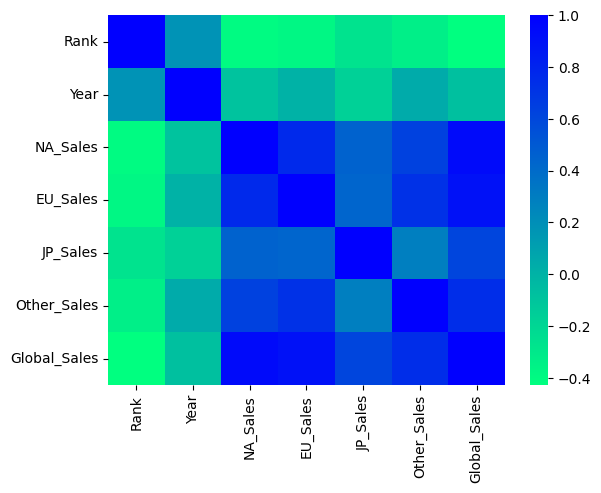

In [27]:
sns.heatmap(df.corr(numeric_only=True), cmap="winter_r")
plt.show()


In [32]:
df.drop(columns=['Name', 'Genre', 'Publisher'], inplace=True)


11493

In [59]:
# Publisher column has too many unique values, so we will use 3 categories:

publisher_counts = df['Publisher'].value_counts()

def categorize_publisher(x):
    if pd.isna(x):
        return 'unknown_publisher'
    elif publisher_counts.get(x, 0) > 30:
        return 'strong_publisher'
    else:
        return 'weak_publisher'

df['Publisher_Strength'] = df['Publisher'].map(categorize_publisher)
df.drop(columns=['Publisher'], inplace=True)

In [70]:
# 'Year' sütununu datetime formatına çevir ve sadece yılı al
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

In [61]:
# rank and name columns no need for them
df.drop(columns=['Rank', 'Name'], inplace=True)
df.head()

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_Strength
0,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74,strong_publisher
1,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,strong_publisher
2,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82,strong_publisher
3,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00,strong_publisher
4,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,strong_publisher


## 2. Split data into training and testing sets and Train multiple regression models

In [74]:
X = df.drop(columns=['Global_Sales'])
y = df['Global_Sales']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Define the models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Support Vector Regressor": SVR()
    }
    
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "R2": r2}
        print(f"{name} - MSE: {mse}, R2: {r2}")
    
    return results

# Call the function with the training and testing data
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

Linear Regression - MSE: 2.7133497778246888e-05, R2: 0.9999936493286778
Ridge Regression - MSE: 2.7755384428332803e-05, R2: 0.9999935037743617
Lasso Regression - MSE: 4.273703714760723, R2: -0.0002723512708604492
Decision Tree - MSE: 0.6236374632152817, R2: 0.8540359011046066
Random Forest - MSE: 0.7486094390123325, R2: 0.8247858593570401
Support Vector Regressor - MSE: 4.39721119364017, R2: -0.029179623403831956


## 3. Compare the models

The video game sales prediction project shows that Linear Regression and Ridge Regression models are the most effective, achieving near-perfect R2 scores of approximately 0.99999 and very low Mean Squared Errors (MSE).
In contrast, Lasso Regression and Support Vector Regressor (SVR) models perform poorly, with negative R2 scores and high MSE, indicating substantial prediction errors

Decision Tree and Random Forest models perform reasonably well but are less accurate than the linear models. Overall, Linear Regression and Ridge Regression are the best models for predicting global video game sales in this dataset.

## 4. Save the best model

In [77]:
import pickle

# Save the best model
best_model = Ridge()
best_model.fit(X_train, y_train)

pickle.dump(best_model, open('video_game_sales_prediction_ridge.pkl', 'wb'))


In [82]:
import sklearn
print(sklearn.__version__)

1.5.1
